# 5. Dask Bag

### Scenariusz: wczytanie pliku jsonl i obliczenie liczności poszczególnych protokołów.

In [1]:
from dask import bag as db


b = db.read_text('data/flows-1.jsonl')
b

dask.bag<bag-from-delayed, npartitions=1>

In [2]:
b.compute()

['{"ts": "2019-07-16 23:55:09", "te": "2019-07-16 23:55:09", "td": 0.0, "sa": "PL", "da": "PL", "sp": 161, "dp": 50572, "pr": "UDP", "flg": "......", "fwd": 0, "stos": 0, "ipkt": 0, "ibyt": 0, "opkt": 0, "obyt": 0, "in": 0, "out": 0, "sas": 0, "das": 0, "smk": 0, "dmk": 0, "dtos": 0, "dir": "0.0.0.0", "nh": "0.0.0.0", "nhb": 0, "svln": 0, "dvln": 0, "ismc": "00:00:00:00:00:00", "odmc": "00:00:00:00:00:00", "idmc": "00:00:00:00:00:00", "osmc": "00:00:00:00:00:00", "mpls1": "0-0-0", "mpls2": "0-0-0", "mpls3": "0-0-0", "mpls4": "0-0-0", "mpls5": "0-0-0", "mpls6": "0-0-0", "mpls7": "0-0-0", "mpls8": "0-0-0", "mpls9": "0-0-0", "mpls10": "0-0-0", "cl": 0.0, "sl": 0.0, "al": 0.0, "ra": "0.0.0.0", "eng": "0/0", "exid": 0, "tr": "1970-01-01 01:00:00.000"}\n',
 '{"ts": "2019-07-16 23:55:09", "te": "2019-07-16 23:55:09", "td": 0.0, "sa": "PL", "da": "PL", "sp": 34906, "dp": 161, "pr": "UDP", "flg": "......", "fwd": 0, "stos": 0, "ipkt": 1, "ibyt": 92, "opkt": 0, "obyt": 0, "in": 0, "out": 0, "sas

In [3]:
import json


b = db.read_text('data/flows-1.jsonl')
records = b.map(json.loads)
records.take(1)


({'ts': '2019-07-16 23:55:09',
  'te': '2019-07-16 23:55:09',
  'td': 0.0,
  'sa': 'PL',
  'da': 'PL',
  'sp': 161,
  'dp': 50572,
  'pr': 'UDP',
  'flg': '......',
  'fwd': 0,
  'stos': 0,
  'ipkt': 0,
  'ibyt': 0,
  'opkt': 0,
  'obyt': 0,
  'in': 0,
  'out': 0,
  'sas': 0,
  'das': 0,
  'smk': 0,
  'dmk': 0,
  'dtos': 0,
  'dir': '0.0.0.0',
  'nh': '0.0.0.0',
  'nhb': 0,
  'svln': 0,
  'dvln': 0,
  'ismc': '00:00:00:00:00:00',
  'odmc': '00:00:00:00:00:00',
  'idmc': '00:00:00:00:00:00',
  'osmc': '00:00:00:00:00:00',
  'mpls1': '0-0-0',
  'mpls2': '0-0-0',
  'mpls3': '0-0-0',
  'mpls4': '0-0-0',
  'mpls5': '0-0-0',
  'mpls6': '0-0-0',
  'mpls7': '0-0-0',
  'mpls8': '0-0-0',
  'mpls9': '0-0-0',
  'mpls10': '0-0-0',
  'cl': 0.0,
  'sl': 0.0,
  'al': 0.0,
  'ra': '0.0.0.0',
  'eng': '0/0',
  'exid': 0,
  'tr': '1970-01-01 01:00:00.000'},)

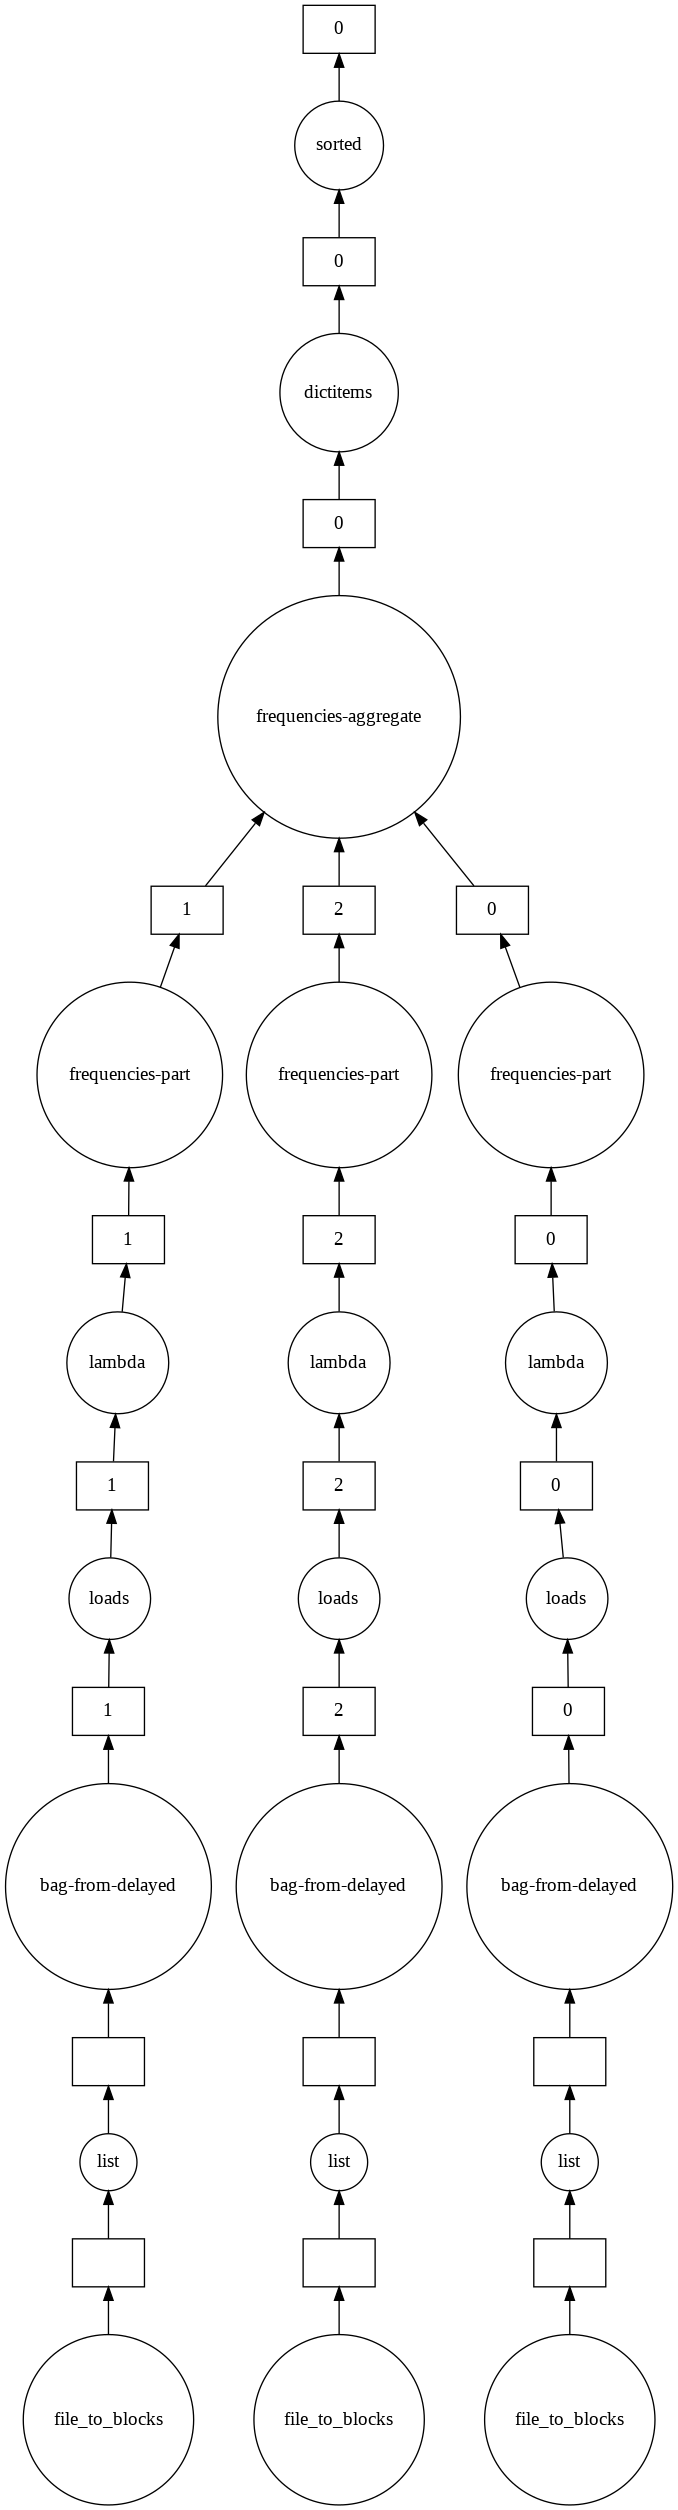

In [4]:
import json


b = db.read_text('data/flows-*.jsonl')
records = b.map(json.loads)
task = records.map(lambda d: d['pr']).frequencies(sort=True)
task.visualize()

In [5]:
task.compute()

[('UDP', 984), ('ICMP', 344), ('TCP', 172)]